## Cross Validation with Linear Regression
This notebook demonsteates the use of cross -validation with linear regression, cross validation is a technique which is heavily use in the field of machine learning.We will use sklearn for cross validation.

Key sreas of this notebook
- Experiment to understand overfitting
- Buil a linear regression model without cross-validation
- Problems with the approach (no cross-validation)
- What is cross-validaTION
- cROSS VALIDATION IN SKLEARN

### Experiment to understand overfitting

We will use polynomial regression to understand the impact of overfitting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')


In [ ]:
# import housing data
housing = pd.read_csv('Housing.csv')
housing.head()

In [ ]:
housing.shape

### For the experiment we will do regression only opn one parameter and that is area. So we will take out our target variable price and the feature variable area

In [ ]:
df = housing[ ['area','price'] ]
df

In [ ]:
# Lets visualize the relationship between area and price

sns.scatterplot(data=df,x=df.area,y=df.price)
plt.show()

# it shows to some extent linearity between price and area

In [ ]:
# Test Train Split
df_train,df_test= train_test_split(df, test_size=.3,random_state=10)

In [ ]:
print(len(df_train))

In [ ]:
# Create X and y for both train and test data
X_train = df_train['area']
y_train = df_train['price']

X_test = df_test['area']
y_test = df_test['price']

In [ ]:
X_train.shape

### Now we will use multiple polynomials to the training data apart from a straight line.Fitting polynomial to the startight line is known as polunomial regression.We will try to fit a single indeterminate polynomial regression here as we have only one feature variable as area for our test. In sklearn polynomial features can be generated using `PolynomialFeatures` class.


In [ ]:
# Polynomial degree 1 (Linear) and 10
# Since we use 1D array for the feature varaible (area) we must convert it to (n,1) as sklearn does not accept shape (n, )
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


In [ ]:
# Pipeline = A sequence of data transformers with an optional final predictor.
# Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.
# Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

# We will Perform MinMaxScelar as preprocessing followed by Linear Regression

from  sklearn.pipeline import make_pipeline,Pipeline
 



In [ ]:
steps = [
    ("Min_Max_Scelar",MinMaxScaler()),
    ("Degree1",LinearRegression())
]

In [ ]:
pipe = Pipeline(steps)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_test_pred = pipe.predict(X_test)
y_test_pred

In [ ]:
y_train_pred = pipe.predict(X_train)
y_train_pred

In [ ]:
import sklearn

In [ ]:
round(sklearn.metrics.r2_score(y_train,y_train_pred),2)

In [ ]:
round(sklearn.metrics.r2_score(y_test,y_test_pred),2)

### So with degree 1 or linear model we have achived a very close r2 score between test and train data

### Now we will fit a polynomial model and will check the same r2 between test and train data


In [ ]:
steps = [
    ("Min_Max_Scelar",MinMaxScaler()),
    ("polinomial",PolynomialFeatures(20)),
    ("Degree20",LinearRegression())
] 

In [ ]:
pipe = Pipeline(steps)

In [ ]:
pipe

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
#Predict on training data
y_train_pred = pipe.predict(X_train)
y_train_pred

In [ ]:
#Predict on test  data
y_test_pred = pipe.predict(X_test)
y_test_pred

In [ ]:
# Calculate the r2 score on training data
round(sklearn.metrics.r2_score(y_train,y_train_pred),2)

In [ ]:
# Calculate the r2 score on test data

round(sklearn.metrics.r2_score(y_test,y_test_pred),2)

##  1. Now we will build a linear regression model without using cross -validation.
#### Steps included
    . data pre processing (convert boolean to 1,0 and categorical variables to dummy)
    . Train/Test split
    . Feature scaling on train data
    . Feature scaling on test data
    . Divide into X and y
    . RFE based feature selection
    . Model fiting and prediction

In [ ]:
# Convert yes/no colmns to 1/0
bol_var = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']  
for i in  bol_var:
    housing[i] = housing[i].map({'yes':1,'no':0}) 
housing[bol_var]      

In [ ]:
# Convert Categorical variables to dummy
# For that first change the data type to category and then create dummy, this will create dummy and drop the original col at the same time

housing.furnishingstatus = housing.furnishingstatus.astype('category')
status = pd.get_dummies(housing.furnishingstatus,dtype=int,drop_first=True)
housing.drop(['furnishingstatus'],axis=1,inplace=True)
housing = pd.concat([housing,status],axis=1)
housing.head()

In [ ]:
# Train-Test split using sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train,df_test = train_test_split(housing,train_size=.7,random_state=11)

In [ ]:
# Divide into X and y for train
y_train = df_train.pop('price')
X_train = df_train

# Divide into X and y for test
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Feature scaling of train data for the numerical feature varaibales
# We use MinMax scelar

numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = MinMaxScaler()
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train[numeric_vars]

In [ ]:
# Now we will use scaling of test data
# On Test data we should only use transform using the same scaler object

df_test[numeric_vars] = scaler.transform(df_test[numeric_vars] )
df_test.head()

## Use RFE - Now, we have 13 predictor features. To build the model using RFE, we need to tell RFE how many features we want in the final model. It then runs a feature elimination algorithm.
#### Note that the number of features to be used in the model is a `hyperparameter`.




In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# first select an arbitrary no of feature as 10

model = LinearRegression()
model.fit(X_train,y_train)

#Apply RFE
rfe = RFE(model,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)


In [ ]:
# tuples of (feature name, whether selected, ranking)

list(zip(df_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# predict prices of X_test

y_test_pred = rfe.predict(X_test)

In [ ]:
# Evaluate the model performance
round(sklearn.metrics.r2_score(y_test,y_test_pred),3)

In [ ]:
# Now create another model even reduced number of feature varaiables
model = LinearRegression()
model.fit(X_train,y_train)

rfe = RFE(model,n_features_to_select=6)
rfe = rfe.fit(X_train,y_train)

In [ ]:
# predict prices of X_test
y_test_pred = rfe.predict(X_test)

# Evaluate the model performance
round(sklearn.metrics.r2_score(y_test,y_test_pred),2)

### K-fold cross validation

In [ ]:
# We will perform k-fold cv with all 13 feature variables
from sklearn.model_selection import cross_val_score

In [116]:
model =LinearRegression()
scores  = cross_val_score(model,X_train,y_train,scoring='r2',cv=5)
scores

array([0.64878953, 0.68327107, 0.62222529, 0.74800986, 0.65809982])

In [117]:
# can tune other metrics, such as MSE
scores = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
scores

array([-1.16798003e+12, -1.21484841e+12, -1.58749933e+12, -8.78381870e+11,
       -1.13827735e+12])

## Use of K-fold cross validation for hyper parameter tuning. We will use grid search cross validation technique for the hyper parameter tuning here.
#### In our case the number of hyper parameteres are 13 which are the number of parameters or feature variables. We will perform the k-fold CV for each of the 13 variables and take mean of train and test score for each. With CV =5 we will get 4 training data mean and 1 test data mean for each hyper parameter. Mean of the training and test data of ech hyperparameter will then be plotted to get a visualization about the impact.


In [123]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [124]:
# Step 1 : Create a cross validation scheme

kfold = KFold(n_splits=5,random_state=100,shuffle=True)

# Step 2 : Specify the range of hyper parameters
hyper_params = [{'n_features_to_select' : list(range(1,14))}]

# Step 3 : perform grid search
# Step 3.1 : Specify model
model = LinearRegression()
model.fit(X_train,y_train)
rfe = RFE(model)

# Step 3.2 : Perform grid search
model_cv = GridSearchCV(estimator=rfe,scoring='r2',return_train_score=True,param_grid=hyper_params,cv=kfold,verbose=1)
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [126]:
cv_results  = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043284,0.007811,0.005545,0.001479,1,{'n_features_to_select': 1},0.214842,0.065616,0.182113,0.247254,...,0.203338,0.080246,13,0.321667,0.288158,0.283864,0.311650,0.279224,0.296913,0.016672
1,0.025857,0.003484,0.003718,0.000569,2,{'n_features_to_select': 2},0.396607,0.322564,0.475573,0.452122,...,0.431318,0.065683,12,0.487367,0.493136,0.470345,0.474865,0.435568,0.472256,0.020104
2,0.021895,0.004170,0.004107,0.000703,3,{'n_features_to_select': 3},0.489339,0.299628,0.522051,0.496118,...,0.481159,0.098714,11,0.555574,0.527728,0.549653,0.551427,0.504613,0.537799,0.019209
3,0.027703,0.001584,0.004722,0.000985,4,{'n_features_to_select': 4},0.484793,0.408584,0.558733,0.522473,...,0.519229,0.071373,10,0.566355,0.572052,0.581420,0.585053,0.543405,0.569657,0.014705
4,0.026107,0.001732,0.005967,0.000620,5,{'n_features_to_select': 5},0.542946,0.454245,0.538221,0.510935,...,0.539680,0.064445,9,0.588962,0.599792,0.629090,0.634579,0.590843,0.608653,0.019356
5,0.027660,0.004115,0.005553,0.000915,6,{'n_features_to_select': 6},0.591945,0.480954,0.519999,0.533743,...,0.562445,0.071134,8,0.630888,0.646387,0.637637,0.674963,0.631931,0.644361,0.016260
6,0.029347,0.004648,0.006903,0.001701,7,{'n_features_to_select': 7},0.630419,0.495689,0.596057,0.554653,...,0.594309,0.067363,7,0.663826,0.653613,0.672705,0.681577,0.641164,0.662577,0.014170
7,0.024781,0.001072,0.006468,0.000782,8,{'n_features_to_select': 8},0.642471,0.583434,0.631758,0.560043,...,0.623201,0.048280,5,0.672382,0.678877,0.691564,0.684295,0.643742,0.674172,0.016470
8,0.020741,0.002113,0.006518,0.000568,9,{'n_features_to_select': 9},0.622054,0.570129,0.636053,0.576194,...,0.622708,0.050144,6,0.686331,0.686253,0.706789,0.699374,0.660829,0.687915,0.015662
9,0.016390,0.001004,0.006519,0.000986,10,{'n_features_to_select': 10},0.653151,0.596168,0.640294,0.600386,...,0.640224,0.041765,4,0.694944,0.697789,0.709485,0.708327,0.668771,0.695863,0.014693


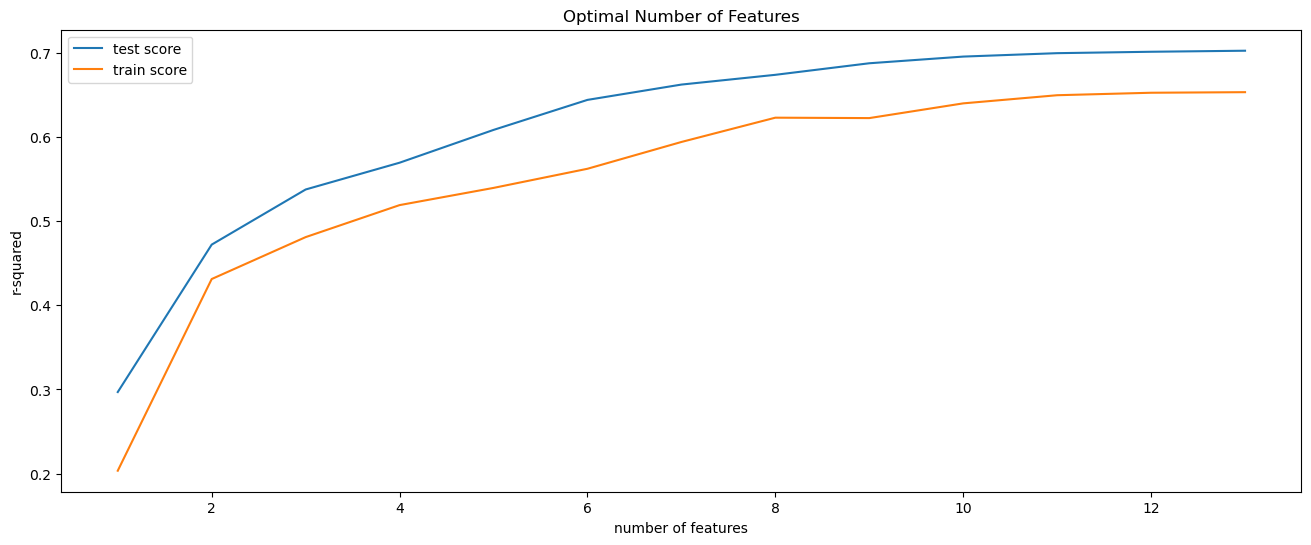

In [129]:
# plotting cv results

plt.figure(figsize=(16,6))
plt.plot(cv_results['param_n_features_to_select'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_n_features_to_select'] , cv_results['mean_test_score'])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

#### Now we can choose the optimal value of number of features and build a final model.We choose 10

In [131]:
model = LinearRegression()
model.fit(X_train,y_train)
rfe = RFE(model,n_features_to_select=10)

rfe = rfe.fit(X_train,y_train)

# predict prices of X_test
y_test_pred = rfe.predict(X_test)
r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred),2)
r2

0.6